<font color='RED'><font size='7'>TP2 : descente de gradient</font>


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

<font color='RED'><font size='5'>Exercice 1</font>


In [10]:
from numpy.linalg import norm

<font color='RED'>Question 1</font>


On écrit une fonction qui conserve toutes les itérations de l'algorithme du gradient, mais qui renvoie seulement la dernière valeur trouvée et le nombre d'itérations effectuées

In [8]:
def descGrad(x,maxIter,pas,epsilon):
    a=np.array(x, dtype='float32') 
    X = [tf.Variable(a,name='x')]

    for i in range(maxIter):
        with tf.GradientTape() as g:
            g.watch(X[-1])
            z = 4*(X[-1][0]-1)**2 + 0.5*(tf.exp(X[-1][1]-3)-1)**2
        dz_dx = g.gradient(z,X[-1])
        #print(dz_dx)    
        X.append(X[-1]-pas*dz_dx)
        if norm(X[-1]-X[-2])<epsilon:
            print("L'algorithme a convergé en ", i," itérations")
            break
        if i == maxIter-1:
            print("L'algorithme n'a pas convergé")
    return(X[i],i)
    
    

In [11]:
descGrad([2,4],2000,0.01,1e-8)

L'algorithme a convergé en  1007  itérations


(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.0000007, 3.0000117], dtype=float32)>,
 1007)

<font color='RED'>Question 2</font>


On créé une fonction dont le seul argument est le pas que l'on cherche à optimiser, qui résoud le problème de descente de gradient et qui renvoie le nombre d'itérations nécéssaires

In [27]:
def optFun(p):
    return descGrad([2,4],2000,p,1e-8)[1]

test:

In [17]:
optFun(0.01)

L'algorithme a convergé en  1007  itérations


1007

On utilise la fonction minimize_scalar de scipy.optimize


In [28]:
from scipy.optimize import minimize_scalar

<font color='RED'>Attention, la fonction prend plusieurs minutes à s'éxecuter et ne renvoie pas le résultat attendu comme expliqué ci-dessous</font>


In [24]:
res = minimize_scalar(optFun, bounds=[0.1,1])

L'algorithme a convergé en  0  itérations
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme a convergé en  0  itérations
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme a convergé en  88  itérations
L'algorithme a convergé en  226  itérations
L'algorithme n'a pas convergé
L'algorithme a convergé en  554  itérations
L'algorithme n'a pas convergé
L'algorithme a convergé en  1330  itérations
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas convergé
L'algorithme n'a pas

In [26]:
res['x']

-9.242824092148152e-09

On ne s'attend pas à un résultat négatif, surtout quand on a spécifié des bornes positives à la fonction minimize_scalar. <br>Une des faiblesses de l'algorithme que j'ai écrit est qu'il se termine dès la première itération si le pas est négatif car <br> X[-1]<X[-2] donc X[-1]-X[-2]<0<epsilon

<font color='RED'>Question 4</font>


On ajoute le terme du moment à la relation de récurrence de l'algorithme précédent

In [29]:
def descGradMom(x,maxIter,pas,epsilon,m):
    a=np.array(x, dtype='float32')
    X = [tf.Variable(a,name='x'),tf.Variable(a,name='x')]

    for i in range(maxIter):
        with tf.GradientTape() as g:
            g.watch(X[-1])
            z = 4*(X[-1][0]-1)**2 + 0.5*(tf.exp(X[-1][1]-3)-1)**2
        dz_dx = g.gradient(z,X[-1])
        #print(dz_dx)    
        X.append(X[-1]-pas*dz_dx +m*(X[-1]-X[-2]))
        if norm(X[-1]-X[-2])<epsilon:
            print("L'algorithme a convergé en ", i," itérations")
            break
        if i == maxIter-1:
            print("L'algorithme n'a pas convergé")
    return(X[i],i)
    
    

<font color='RED'>Question 5</font>


On teste des valeurs de m allant de -1 à 1 par intervalle de 0.1

In [67]:
for i in range(-10,11):
    print(descGradMom([2,4],2000,0.01,1e-8,0.1*i))

L'algorithme n'a pas convergé
(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.0205814e+33, 3.7435532e+00], dtype=float32)>, 1999)
L'algorithme n'a pas convergé
(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.0000002, 3.0000105], dtype=float32)>, 1999)
L'algorithme n'a pas convergé
(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.0000007, 3.0000112], dtype=float32)>, 1999)
L'algorithme n'a pas convergé
(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.0000006, 3.0000117], dtype=float32)>, 1999)
L'algorithme n'a pas convergé
(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.0000006, 3.0000114], dtype=float32)>, 1999)
L'algorithme a convergé en  1369  itérations
(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.0000007, 3.0000358], dtype=float32)>, 1369)
L'algorithme a convergé en  1276  itérations
(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.0000007, 3.000036 ], dtype=float32)>, 1276)
L'algorithme a convergé en  1292  itérations
(<tf.Tensor: s

m = 0.8 permet à l'algo de converger en seulement 190 itérations contre environ 1000 auparavant

<font color='RED'>Question 6</font>


On ajoute le terme du moment au point d'évaluation du gradient, appelé nestPt <br> On initialise notre tableau de résultat en double

In [329]:
def descGradMomNest(x,maxIter,pas,epsilon,m):
    a=np.array(x, dtype='float32')
    X = [tf.Variable(a,name='x'),tf.Variable(a,name='x')]
    
    for i in range(maxIter):
        with tf.GradientTape() as g:
            nestPt = X[-1]+m*(X[-1]-X[-2])
            g.watch(nestPt)
            z = 4*(nestPt[0]-1)**2 + 0.5*(tf.exp(nestPt[1]-3)-1)**2
            dz_dx = g.gradient(z, nestPt)
        
        #print(dz_dx)    
        X.append(X[-1]-pas*dz_dx +m*(X[-1]-X[-2]))
        if norm(X[-1]-X[-2])<epsilon:
            print("L'algorithme a convergé en ", i," itérations")
            break
        if i == maxIter-1:
            print("L'algorithme n'a pas convergé")
    return(X[i],i)   
    

In [330]:
descGradMomNest([2,4],2000,0.01,1e-8,0.8)

L'algorithme a convergé en  180  itérations


(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.       , 3.0000114], dtype=float32)>,
 180)

En reprenant m=0.8, l'algorithme converge environ 5% plus vite. On pourrait probablement obtenir des meilleurs résultats en cherchant une meilleure valeur de m

<font color='RED'><font size='5'>Exercice 2</font>


Remarque : j'ai fait l'exercice avec le csv de l'ADEME plutôt que celui de moodle 

<font color='RED'>Question 1</font>


In [33]:
import seaborn as sns
from matplotlib import pyplot as plt

In [32]:
df=pd.read_csv("isolation.csv")

In [34]:
pd.set_option('display.max_columns', None)

In [130]:
df.head()

,id,cout_materiaux_ht,cout_implementation_ht,cout_total_ht,cout_induit_ht,date_sigture_devis,date_facture,date_x,annee_travaux,revenu_mo,climat,Code Région,region,Code département,departement,type_logement,annee_construction,constr_cat,nb_pieces,surf_habitable,montant_aides_fincieres,type_aides_fincieres,renovation_globale,marque,modele,poste_isolation,isolant,epaisseur,resistance,surface,lambda
0,1.0,NaN,NaN,29.383886,NaN,NaN,22/11/2016,22/11/2016,2016.0,NaN,H2,53.0,BRE,56,MORBIHAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ITI,LAINE MINERALE,NaN,4.0,NaN,NaN
1,2.0,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,H2,84.0,ARA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ITE,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,38.862559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,IDF,NaN,NaN,INDIVIDUEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COMBLES PERDUES,NaN,NaN,7.0,NaN,NaN
3,4.0,NaN,NaN,40.758294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,IDF,NaN,NaN,INDIVIDUEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COMBLES PERDUES,LAINE VEGETALE,350.0,7.0,NaN,0.05
4,5.0,NaN,NaN,45.497630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,IDF,NaN,NaN,INDIVIDUEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COMBLES PERDUES,LAINE VEGETALE,NaN,7.0,NaN,NaN


In [131]:
df.describe()

,id,cout_materiaux_ht,cout_implementation_ht,cout_total_ht,cout_induit_ht,annee_travaux,revenu_mo,Code Région,annee_construction,nb_pieces,surf_habitable,montant_aides_fincieres,epaisseur,resistance,surface,lambda
count,4281.00000,376.000000,350.000000,4020.000000,215.000000,1671.000000,228.000000,4221.000000,1747.000000,193.000000,2141.000000,937.000000,1458.000000,1897.000000,1774.000000,349.000000
mean,2141.00000,3531.530201,2320.943087,8966.093156,4117.821316,2014.266308,27991.017544,45.265814,1932.622210,4.989637,107.964035,4706.109925,243.864883,5.738113,79.605185,0.036585
std,1235.96258,4865.633159,3270.757055,10151.167713,5313.878674,2.715722,16434.164382,21.795396,55.361473,1.499964,50.251881,5386.105515,131.308797,1.782438,52.596156,0.005827
min,1.00000,33.000000,0.535550,29.383886,13.100000,2001.000000,633.000000,6.000000,1450.000000,2.000000,24.000000,-13.000000,30.000000,0.700000,4.000000,0.021500
25%,1071.00000,1190.284360,500.000000,2369.668246,818.005000,2012.000000,17384.000000,28.000000,1900.000000,4.000000,80.000000,1800.000000,140.000000,3.800000,44.000000,0.032000
50%,2141.00000,2163.507109,995.156398,4948.341232,1835.700000,2015.000000,24746.500000,32.000000,1948.000000,5.000000,100.000000,2500.000000,240.000000,6.200000,74.000000,0.038000
75%,3211.00000,3697.630332,2607.007109,12361.137440,4851.000000,2016.000000,33041.000000,53.000000,1972.000000,6.000000,126.000000,7000.000000,330.000000,7.400000,101.000000,0.040000
max,4281.00000,43955.450240,21782.938390,94082.000000,26088.000000,2018.000000,100000.000000,94.000000,2015.000000,12.000000,820.000000,74509.000000,3220.000000,13.200000,655.000000,0.060000


On utilise la méthode describe des DataFrame pandas pour récupérer le nom des colonnes que pandas détecte comme étant numériques

In [35]:
df_num = df.describe()
df_num = df_num.drop(['id','Code Région'], axis=1)

On affiche un violinplot pour chaque feature numérique afin de visualiser la distribution 

In [36]:
fig, axs = plt.subplots(dpi = 300, nrows = df_num.columns.size, figsize = (21,49.7)) 

for i,col in zip(range(df_num.columns.size),df_num.columns):
    sns.violinplot(df[col], ax=axs[i])
    axs[i].tick_params(axis='both', which='major', labelsize=8)
    axs[i].set_xlabel(col,loc='center', fontsize=10)

plt.tight_layout()


On remarque des graphes aux formes similaires comme lambda et résistance ou cout_materiaux_ht et cout_implementation_ht qui sont probablement très corrélés

On affiche une heatmap des corrélations

<AxesSubplot:>

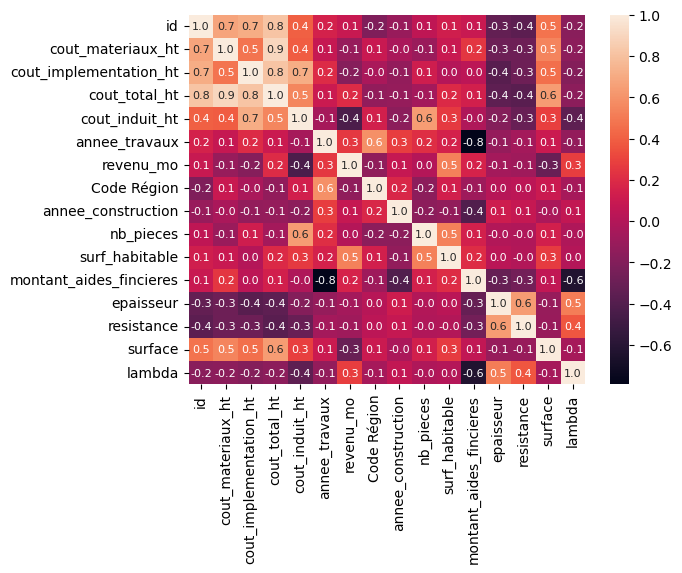

In [168]:
sns.heatmap(df.corr(numeric_only=True), annot=True,fmt=".1f",annot_kws={"fontsize":8})

Les features les plus corrélées sont cout_total_ht et cout_materiaux_ht, ce qui semble indiquer que le coût total d'une restauration thermique provient essentiellement du coût des matériaux utilisés

<font color='RED'>Question 2</font>


In [38]:
df2 = df[['cout_total_ht','resistance','surface']]
df2 = df2.dropna()

On centre et réduit les données (scaling)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2),df2.index,df2.columns,dtype=float)

Commençons par essayer d'inférer cette regression linéaire par des méthodes de machine learning existantes

In [40]:
from sklearn.model_selection import train_test_split

X = df2.drop(['cout_total_ht'],axis=1)
y = df2['cout_total_ht']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #méthode des moindres carrés
model.fit(X_train,y_train)
model.predict(X_test)

array([ 4.85840237e-01, -8.92597229e-01, -4.02944116e-01,  8.93063150e-02,
       -8.57923710e-01,  8.86784170e-02, -2.04149119e-01,  9.82456779e-01,
        1.23351937e-01, -6.64208448e-01,  7.20165100e-01, -3.59894734e-01,
        1.58626165e+00, -8.91892314e-01,  1.19649098e+00,  2.84582390e-01,
        4.23342176e-01, -9.63898962e-02, -2.61196271e-01,  2.17099027e-01,
       -8.10550853e-01, -4.05284258e-01, -4.97061930e-01, -3.01655967e-01,
        2.59163700e-01, -2.46784690e-01, -2.74437781e-01,  1.07006241e+00,
       -9.30561038e-04, -5.90809020e-01,  8.30763552e-01, -1.34487906e-01,
       -6.45744479e-01, -2.74757610e-01, -5.33255151e-01, -5.99370245e-01,
        8.93063150e-02, -1.77437650e-01,  3.54751397e-01,  9.91517539e-01,
       -7.37065702e-01, -6.43404336e-01, -4.46806758e-01,  5.40048972e-02,
        1.68811351e+00,  8.47244190e-01, -8.59635954e-01, -7.13921447e-01,
        6.23449969e-01, -1.23672263e-01, -4.80310206e-01,  7.05851722e-02,
       -1.43934202e-01, -

On obtient un coefficient de détermination (R<sup>2</sup>) mauvais de 0.6

In [42]:
model.score(X_test,y_test)

0.6334193419870844

Il faut créer une fonction de coût : l'écart entre valeurs prédites et valeurs réelles<br>
Puis on minimise cette fonction pour trouver les coeffs de la régression

In [43]:
target = pd.DataFrame(df2.pop('cout_total_ht'))
data = tf.convert_to_tensor(df2,dtype=tf.double)
target = tf.convert_to_tensor(target,dtype=tf.double)

In [44]:
def descGrad2(x, maxIter,pas,epsilon):
    a=np.array(x, dtype='double')
    X = [tf.Variable(a,name='x')]

    for i in range(maxIter):
        with tf.GradientTape() as g:
            g.watch(X[-1])
            z = tf.abs(target - data@tf.transpose(X[-1]))
            dz_dx = g.gradient(z,X[-1])
        #print("grad= ",dz_dx)    
        X.append(X[-1]-pas*dz_dx)
        if norm(X[-1]-X[-2],2)<epsilon:
            print("L'algorithme a convergé en ", i," itérations")
            break
        if i == maxIter-1:
            print("L'algorithme n'a pas convergé")
    return(X[-1],i)
    
    

In [45]:
descGrad2([[-0.5,0.5]],1000,0.001,1e-3)

L'algorithme n'a pas convergé


(<tf.Tensor: shape=(1, 2), dtype=float64, numpy=array([[-0.60406187,  0.76883421]])>,
 999)

On essaie plusieurs paramètres : l'algorithme ne converge pas, il n'y a probablement pas de corrélation significative entre ces features et le cout total